## **Analysis: Which countries are making the biggest strides in decreasing CO2 output?**

### Datasources used for this analysis
 - co2-per-capita

In [ ]:
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%load_ext google.colab.data_table
%matplotlib inline

In [2]:
### CO2 CHANGE ANALYSIS
# Read and filter data
df_co2_per_capita = pd.read_csv("data/co2-per-capita.csv")  # Most recent year = 2021
df_co2_per_capita.dropna(subset=['Code'], inplace=True)
df_co2_per_capita = df_co2_per_capita.drop(df_co2_per_capita[df_co2_per_capita['Entity'].isin(['World'])].index)
df_co2_per_capita.drop(['Code'], axis=1, inplace=True)

# Calculate the annual percentage change in CO2 emissions per capita
df_co2_per_capita['Percentage change - CO₂ emissions (per capita)'] = df_co2_per_capita.groupby('Entity')['Annual CO₂ emissions (per capita)'].pct_change(periods=1) * 100

# Calculate the absolute change in CO2 emissions per capita
df_co2_per_capita['Absolute change - CO₂ emissions (per capita)'] = df_co2_per_capita.groupby('Entity')['Annual CO₂ emissions (per capita)'].diff()
df_co2_per_capita.dropna(inplace=True)

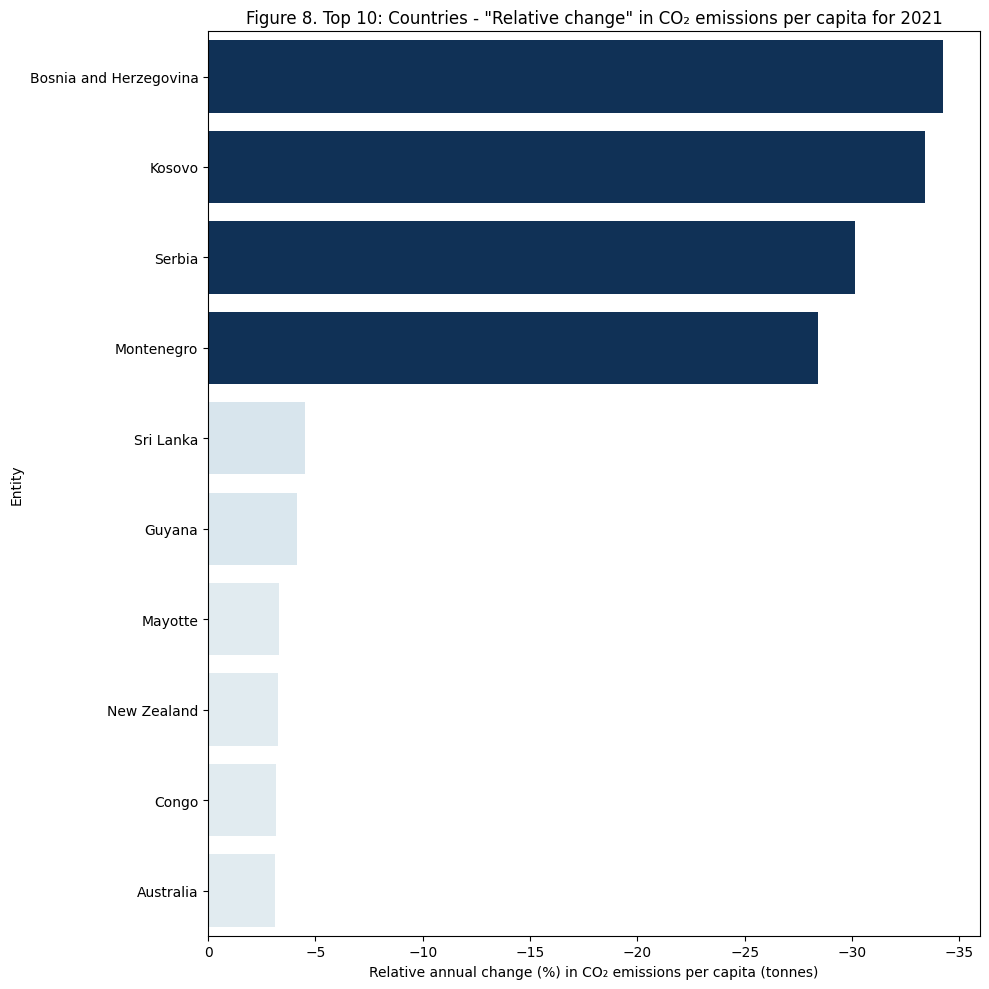

In [4]:
### VISUALS

## BAR CHART (RELATIVE CHANGE)
# Select a certain year
year = 2021

# Filter the data for the selected year
df_year = df_co2_per_capita[df_co2_per_capita['Year'] == year]

# Sort the data by 'Change (%) CO₂ emissions (per capita)'
df_sorted = df_year.sort_values(by='Percentage change - CO₂ emissions (per capita)', ascending=True)

# Select the top 10 countries
top_10_countries = df_sorted.head(10)

# Create a colormap
cmap = plt.get_cmap('RdBu_r')
norm = plt.Normalize(vmin=-25, vmax=25)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='Percentage change - CO₂ emissions (per capita)', y='Entity', data=top_10_countries, ax=ax, palette=cmap(norm(top_10_countries['Percentage change - CO₂ emissions (per capita)'])))

ax.set_xlabel('Relative annual change (%) in CO₂ emissions per capita (tonnes)')
ax.set_title(f'Figure 8. Top 10: Countries - "Relative change" in CO₂ emissions per capita for {year}')
ax.invert_xaxis()

plt.tight_layout()

Figure 8. (see above) shows the countries that have the biggest relative change in CO2 emissions of a certain year.

<ipython-input-5-77f503645790>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, 'Figure 9. Relative change (%) in CO₂ emissions per capita (tonnes) for 2021')

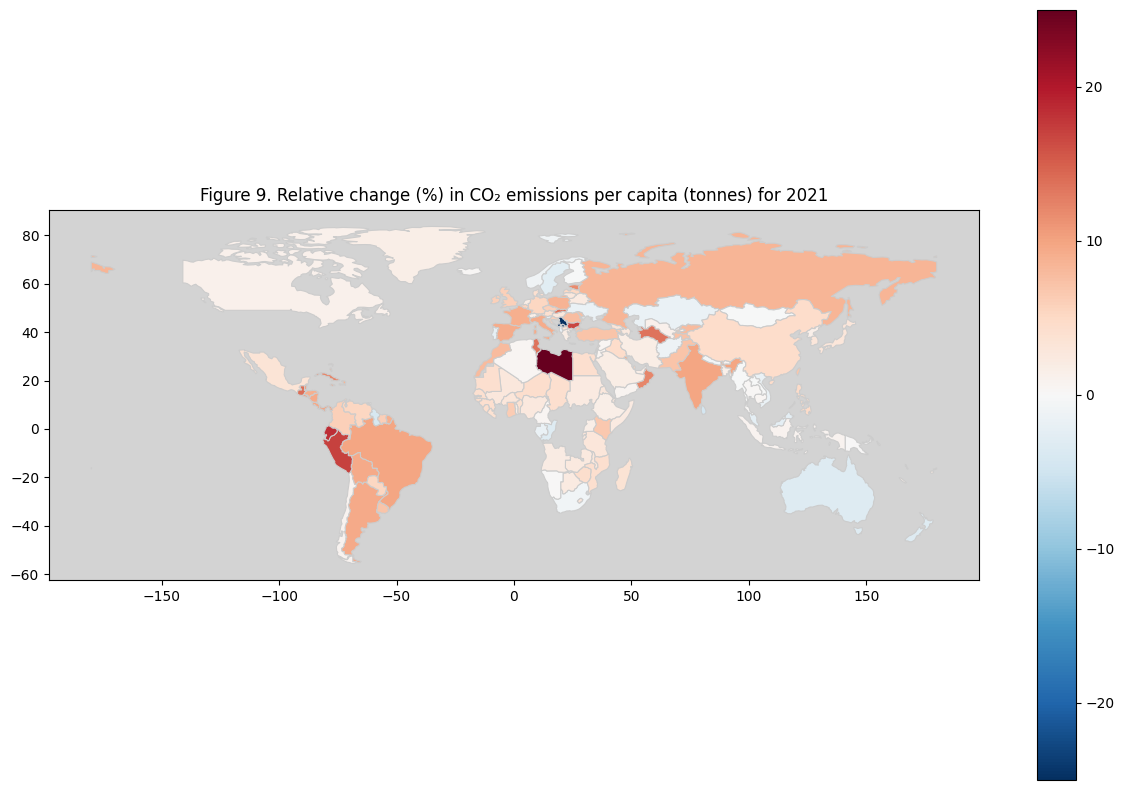

In [5]:
## CHOROPLETH MAP (RELATIVE CHANGE)
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map = world_map.rename(columns={'name': 'Entity'})

# Select a specific year
year = 2021

# Filter your data for the selected year
data_year = df_co2_per_capita[df_co2_per_capita['Year'] == year]

# Merge data with world map data
merged_data = world_map.merge(data_year, left_on='Entity', right_on='Entity')

# Create the Choropleth Map
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_facecolor('lightgray')

norm = plt.Normalize(vmin=-25, vmax=25)
merged_data.plot(column='Percentage change - CO₂ emissions (per capita)', cmap='RdBu_r', linewidth=0.8, ax=ax, edgecolor='0.8', norm = norm, legend=True)
ax.set_title(f'Figure 9. Relative change (%) in CO₂ emissions per capita (tonnes) for {year}')

Figure 9. (see above) shows a world map to make it easier to see in which areas the relative changes in CO2 emissions, of a certain year, take place.

**Note:** Some countries, like 'The United States' and 'Central Africa', are missing from the world map. I have checked the data and they are missing from the imported 'world_map' data. Sadly I wasn't able to fix this.

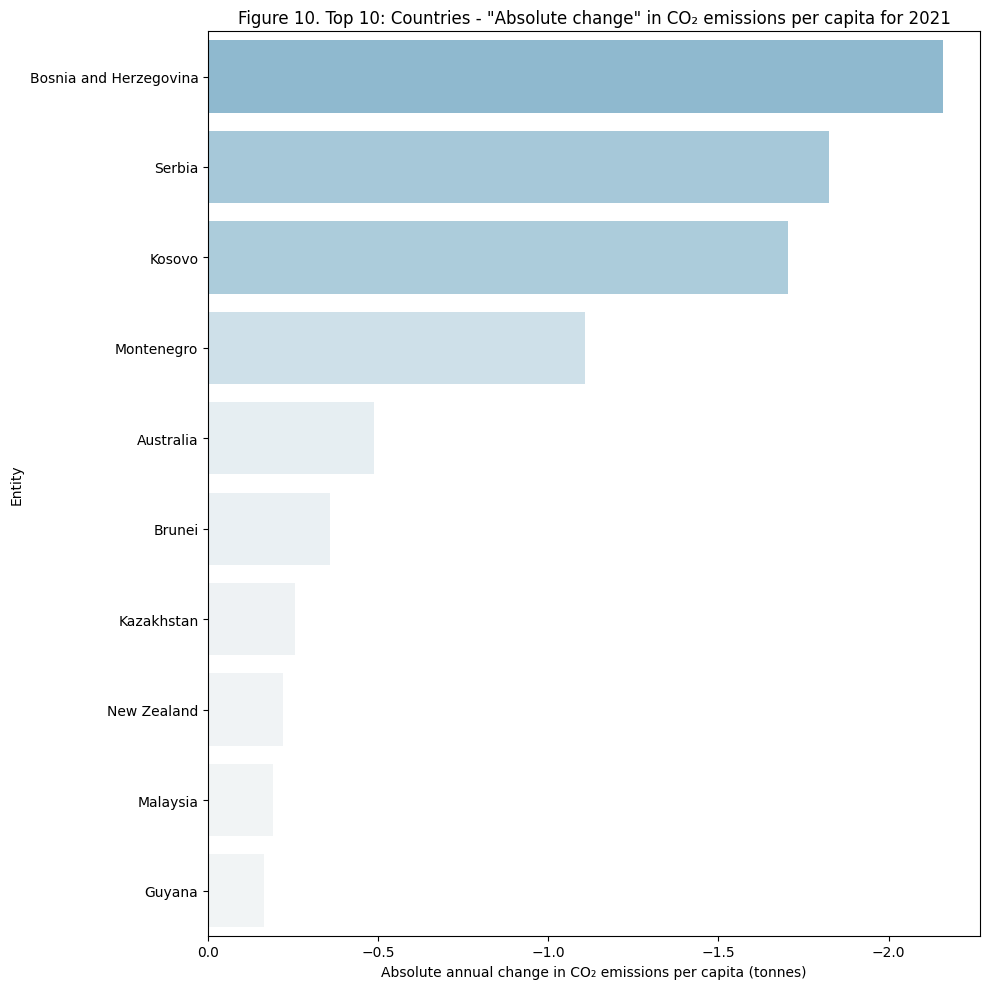

In [6]:
## BAR CHART (ABSOLUTE CHANGE)
# Select a certain year
year = 2021

# Filter the data for the selected year
df_year = df_co2_per_capita[df_co2_per_capita['Year'] == year]

# Sort the data by 'Change (%) CO₂ emissions (per capita)' 
df_sorted = df_year.sort_values(by='Absolute change - CO₂ emissions (per capita)', ascending=True)

# Select the top 10 countries
top_10_countries = df_sorted.head(10)

# Create a colormap
cmap = plt.get_cmap('RdBu_r')
norm = plt.Normalize(vmin=-5, vmax=5)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='Absolute change - CO₂ emissions (per capita)', y='Entity', data=top_10_countries, ax=ax, palette=cmap(norm(top_10_countries['Absolute change - CO₂ emissions (per capita)'])))

ax.set_xlabel('Absolute annual change in CO₂ emissions per capita (tonnes)')
ax.set_title(f'Figure 10. Top 10: Countries - "Absolute change" in CO₂ emissions per capita for {year}')
ax.invert_xaxis()

plt.tight_layout()

Figure 10. (see above) shows the countries that have the biggest absolute change in CO2 emissions of a certain year.

<ipython-input-7-e6f81e37b886>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, 'Figure 11. Absolute change in CO₂ emissions per capita (tonnes) for 2021')

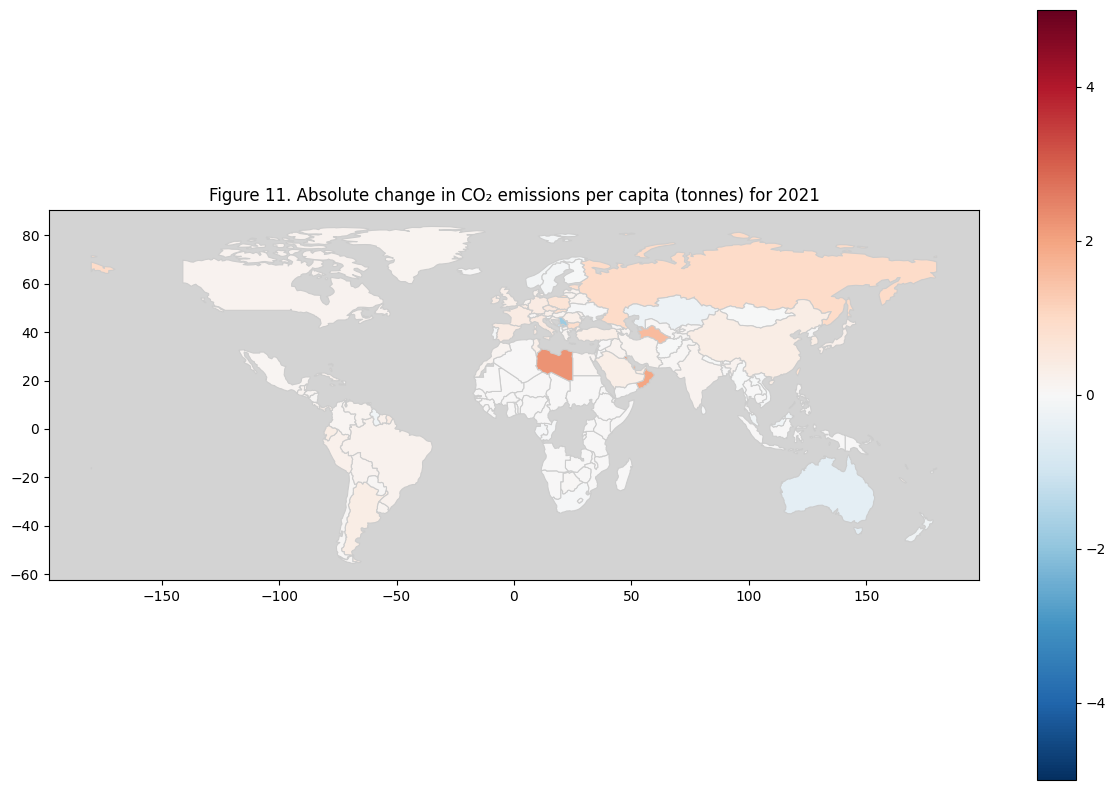

In [7]:
## CHOROPLETH MAP (ABSOLUTE CHANGE)
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map = world_map.rename(columns={'name': 'Entity'})

# Select a specific year
year = 2021

# Filter your data for the selected year
data_year = df_co2_per_capita[df_co2_per_capita['Year'] == year]

# Merge data with world map data
merged_data = world_map.merge(data_year, left_on='Entity', right_on='Entity')

# Create the Choropleth Map
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_facecolor('lightgray')

norm = plt.Normalize(vmin=-5, vmax=5)
merged_data.plot(column='Absolute change - CO₂ emissions (per capita)', cmap='RdBu_r', linewidth=0.8, ax=ax, edgecolor='0.8', norm = norm, legend=True)
ax.set_title(f'Figure 11. Absolute change in CO₂ emissions per capita (tonnes) for {year}')


Figure 11. (see above) shows a world map to make it easier to see in which areas the absolute changes in CO2 emissions, of a certain year, take place.

**Note:** Some countries, like 'The United States' and 'Central Africa', are missing from the world map. I have checked the data and they are missing from the imported 'world_map' data. Sadly I wasn't able to fix this.

## <u>Summary</u>
Here follows a short summary of the conducted analysis.

<br> 

The datasource that is used for this analyses: **'co2-per-capita'**.

I have chosen to use data based on _co2 emissions per capita_ because this gives a better representation of a countries performance on reducing co2 emissions than _co2 emissions_ alone.

Due to the fact that the data is based on _per capita_, the **population growth** of a country is also taken into account.

<br>

To get a better view on reductions of co2 emissions I have chosen to not only analyse **relative (%)** differences but also **absolute** differences. As a bonus I have added a **world map** to spot in which areas the differences took place.

## **Conclusion: Which countries are making the biggest strides in decreasing CO2 output?**

It's very hard to pick one or a few countries that make the biggest strides in decreasing CO2 output. It's very much dependable on the variables taken into account. 

<br>

I have chosen to base the results on **'yearly'** data. Therefor the results differ based on the chosen year.

Overall it's good to not only look at a countries **relative** performance but also their **absolute** performance.

<br> 

When a country has the **biggest negative values** for both _relative_ and _absolute_ differences I consider that country the **best performer** in decreasing CO2 output for the **chosen year**.
